# **Khoirunnisa - MC009D5X2406**

# **1. Import libray**

Mingimport semua libray yang akan dibutuhkan dalam case ini

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay

# **2. Data understanding**

Analisis data dilakukan melalui beberapa tahapan untuk mengidentifikasi insight dan masalah yang perlu ditangani, meliputi:

1. Pemeriksaan Struktur Data (df.info()) - Memverifikasi tipe data dan format dataset
2. Analisis Statistik Deskriptif (df.describe()) - Menilai distribusi dan karakteristik numerik
3. Validasi Data Unik (df.nunique()) - Memastikan konsistensi nilai kategori
4. Deteksi Data Hilang - Mengidentifikasi missing values yang perlu penanganan
5. Pemeriksaan Duplikat - Menemukan dan menangani record yang identik
6. Identifikasi Outlier - Mendeteksi nilai ekstrim yang mungkin mengganggu analisis
7. Eksplorasi Data - Melalui analisis univariat (per variabel) dan multivariat (hubungan antar variabel)

## 2.1 Data loading

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/millkywaay/Dataset-Coding-Camp/refs/heads/main/Machine%20Learning%20Pemula/Mental%20health/mentalhealth_dataset.csv')
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


## 2.2 Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Gender                      1000 non-null   object 
 2   Age                         1000 non-null   int64  
 3   Course                      1000 non-null   object 
 4   YearOfStudy                 1000 non-null   object 
 5   CGPA                        1000 non-null   float64
 6   Depression                  1000 non-null   int64  
 7   Anxiety                     1000 non-null   int64  
 8   PanicAttack                 1000 non-null   int64  
 9   SpecialistTreatment         1000 non-null   int64  
 10  SymptomFrequency_Last7Days  1000 non-null   int64  
 11  HasMentalHealthSupport      1000 non-null   int64  
 12  SleepQuality                1000 non-null   int64  
 13  StudyStressLevel            1000 n

Dataset memiliki 15 kolom, dengan jumlah data 1000 baris data

In [ ]:
df.describe()

,Age,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.402000,3.122530,0.483000,0.474000,0.458000,0.067000,3.4980,0.067000,2.983000,3.045000,9.746000,3.055000
std,2.373611,0.810961,0.499961,0.499573,0.498482,0.250147,2.3081,0.250147,1.417999,1.417386,5.651497,1.422673
min,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,2.250000,0.000000,0.000000,0.000000,0.000000,1.7500,0.000000,2.000000,2.000000,5.000000,2.000000
50%,21.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.0000,0.000000,3.000000,3.000000,9.000000,3.000000
75%,24.000000,4.000000,1.000000,1.000000,1.000000,0.000000,6.0000,0.000000,4.000000,4.000000,15.000000,4.000000
max,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,7.0000,1.000000,5.000000,5.000000,19.000000,5.000000


Analisis statistik menggunakan describe() menunjukkan data numerik terdistribusi dengan baik, ditandai dengan nilai mean dan median yang seimbang serta penyebaran data yang simetris di sekitar nilai tengah, tanpa ditemukan adanya outlier yang signifikan

In [ ]:
df.nunique()

,0
Timestamp,16
Gender,2
Age,8
Course,49
YearOfStudy,7
CGPA,187
Depression,2
Anxiety,2
PanicAttack,2
SpecialistTreatment,2


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = df[col].unique()
    unique_count = df[col].nunique()
    print(f"\nKolom: {col}")
    print(f"Jumlah unik: {unique_count}")
    print(f"Nilai unik: {sorted(unique_values)}")
    print("Contoh distribusi:")
    print(df[col].value_counts().head())


Kolom: Timestamp
Jumlah unik: 16
Nilai unik: ['13/7/2020', '13/7/2021', '13/7/2022', '13/7/2023', '18/7/2020', '18/7/2021', '18/7/2022', '18/7/2023', '2020-07-08', '2020-07-09', '2021-07-08', '2021-07-09', '2022-07-08', '2022-07-09', '2023-07-08', '2023-07-09']
Contoh distribusi:
Timestamp
2021-07-08    190
2020-07-08    183
2023-07-08    176
2022-07-08    176
13/7/2020      58
Name: count, dtype: int64

Kolom: Gender
Jumlah unik: 2
Nilai unik: ['Female', 'Male']
Contoh distribusi:
Gender
Female    760
Male      240
Name: count, dtype: int64

Kolom: Course
Jumlah unik: 49
Nilai unik: ['ALA', 'Accounting ', 'BCS', 'BENL', 'BIT', 'Banking Studies', 'Benl', 'Biomedical science', 'Biotechnology', 'Business Administration', 'CTS', 'Communication ', 'DIPLOMA TESL', 'Diploma Nursing', 'ENM', 'Econs', 'Engine', 'Engineering', 'Fiqh', 'Fiqh fatwa ', 'Human Resources', 'Human Sciences ', 'IT', 'Irkhs', 'Islamic Education', 'Islamic education', 'KENMS', 'KIRKHS', 'KOE', 'Kirkhs', 'Koe', 'Kop', '

Terdapat inkonsistensi data pada kolom Course dan Years of Study, misalnya penulisan "BENL" dan "benl" yang sebenarnya merujuk pada hal yang sama. Perbedaan dalam penggunaan huruf kapital/kecil menyebabkan sistem menganggapnya sebagai nilai yang berbeda sehinga perlu penanganan lebih lanjut dengan merubah value ke format yang sesuai.

In [ ]:
df['Course'] = df['Course'].str.strip().str.title()

course_mapping = {
    'Accounting': 'Accounting',
    'Bcs': 'BCS',
    'Bit': 'BIT',
    'Benl': 'BENL',
    'Biomedical Science': 'Biomedical Science',
    'Biotechnology': 'Biotechnology',
    'Business Administration': 'Business Administration',
    'Cts': 'CTS',
    'Communication': 'Communication',
    'Diploma Tesl': 'TESL',
    'Diploma Nursing': 'Nursing',
    'Econs': 'Economics',
    'Engin': 'Engineering',
    'Engine': 'Engineering',
    'Engineering': 'Engineering',
    'Fiqh': 'Fiqh',
    'Fiqh Fatwa': 'Fiqh',
    'Human Resources': 'Human Resources',
    'Human Sciences': 'Human Sciences',
    'It': 'IT',
    'Irkhs': 'IRKHS',
    'Islamic Education': 'Islamic Education',
    'Kenms': 'KENMS',
    'Kirkhs': 'KIRKHS',
    'Koe': 'KOE',
    'Kop': 'KOP',
    'Law': 'Law',
    'Laws': 'Law',
    'Malcom': 'MALCOM',
    'Marine Science': 'Marine Science',
    'Mathemathics': 'Mathematics',
    'Mathematics': 'Mathematics',
    'Mhsc': 'MHSC',
    'Nursing': 'Nursing',
    'Pendidikan Islam': 'Islamic Education',
    'Psychology': 'Psychology',
    'Radiography': 'Radiography',
    'Taasl': 'TAASL',
    'Usuluddin': 'Usuluddin'
}

df['Course'] = df['Course'].replace(course_mapping)

In [ ]:
df['YearOfStudy'] = df['YearOfStudy'].str.strip().str.lower()

year_mapping = {
    'year 1': 'year 1',
    'year 2': 'year 2',
    'year 3': 'year 3',
}
df['YearOfStudy'] = df['YearOfStudy'].replace(year_mapping)

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


In [ ]:
print("Unique Course:", df['Course'].nunique())
print(df['Course'].value_counts())

print("\nUnique YearOfStudy:", df['YearOfStudy'].nunique())
print(df['YearOfStudy'].value_counts())


Unique Course: 35
Course
Engineering                213
BCS                        177
BIT                        101
KOE                         61
Islamic Education           43
Biomedical Science          33
Law                         32
Psychology                  29
BENL                        24
KIRKHS                      22
Nursing                     21
Fiqh                        20
CTS                         15
Business Administration     14
Communication               13
Human Sciences              13
MALCOM                      12
Marine Science              12
Usuluddin                   11
Accounting                  11
TESL                        11
IRKHS                       10
TAASL                        9
Enm                          9
Human Resources              9
Mathematics                  9
Radiography                  9
Biotechnology                8
KOP                          8
IT                           8
Economics                    8
KENMS         

Nilai unik yang tidak konsisten telah diperbaiki, sehingga terjadi penurunan jumlah kategori. Kolom Course yang sebelumnya memiliki 49 nilai unik kini menjadi 35 setelah standarisasi. Demikian pula, kolom Year of Study yang awalnya memiliki 7 variasi kini telah dirapikan menjadi hanya 4 kategori. Proses ini dilakukan untuk memastikan data lebih bersih dan konsisten, sehingga analisis selanjutnya dapat dilakukan secara lebih akurat dan menghasilkan nilai yang valid.

### 2.2.1 Cek missing value

In [ ]:
df.isna().sum()

,0
Timestamp,0
Gender,0
Age,0
Course,0
YearOfStudy,0
CGPA,0
Depression,0
Anxiety,0
PanicAttack,0
SpecialistTreatment,0


Dataset sudah cukup bersih karena tidak mengadung missing value

### 2.2.2 Cek data duplikat

In [ ]:
duplicate = df.duplicated().sum()
print("Jumlah data duplikast : ", duplicate)

Jumlah data duplikast :  0


Tidak data duplikat

### 2.2.3 Cek data outlier

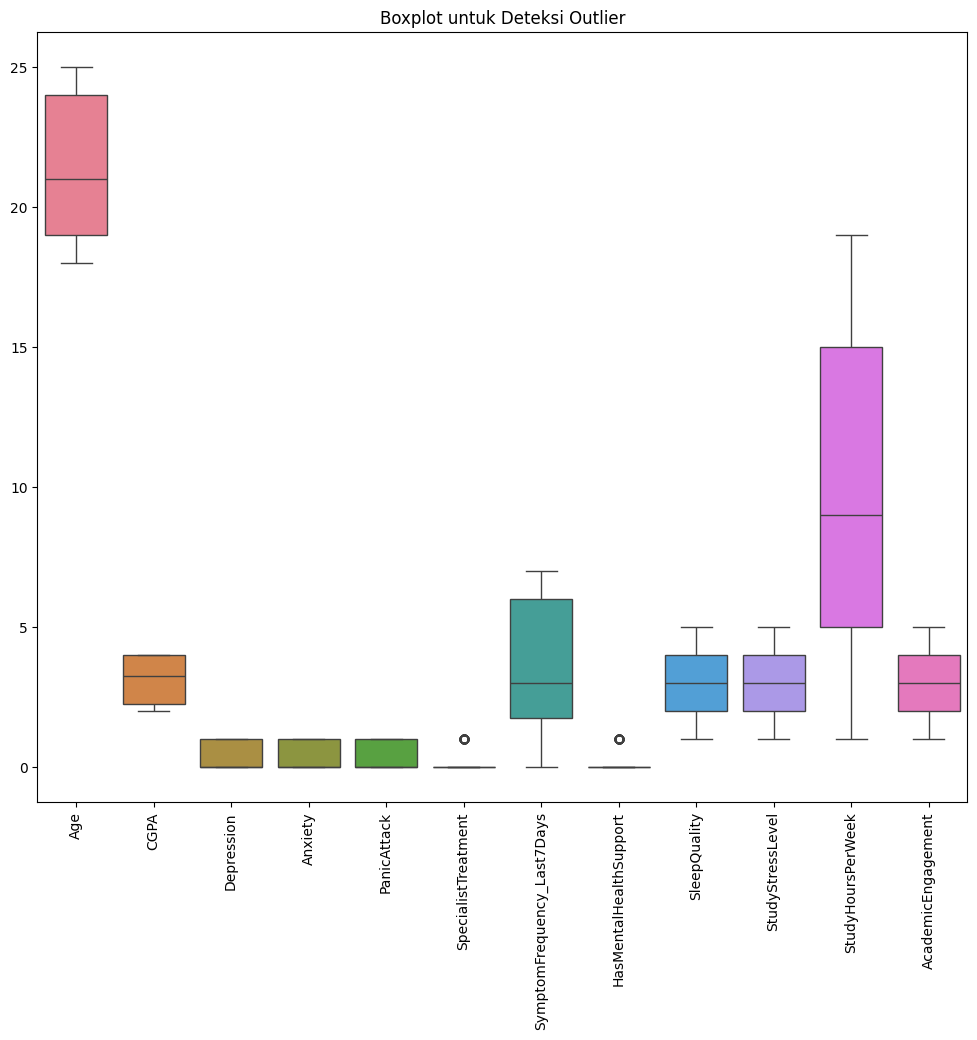

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Boxplot untuk Deteksi Outlier')
plt.show()

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))
print("Jumlah outlier per kolom:")
print(outliers.sum())

Jumlah outlier per kolom:
Age                            0
CGPA                           0
Depression                     0
Anxiety                        0
PanicAttack                    0
SpecialistTreatment           67
SymptomFrequency_Last7Days     0
HasMentalHealthSupport        67
SleepQuality                   0
StudyStressLevel               0
StudyHoursPerWeek              0
AcademicEngagement             0
dtype: int64


In [ ]:
df['SpecialistTreatment'].value_counts()

,count
SpecialistTreatment,
0,933
1,67


In [ ]:
df['HasMentalHealthSupport'].value_counts()

,count
HasMentalHealthSupport,
0,933
1,67


Jika dilihat menggunakan boxplot, kolom `SpecialistTreatment` dan `HasMentalHealthSupport` tidak menunjukkan adanya outlier. Namun ketika dilakukan pengecekan menggunakan metode IQR, teridentifikasi 67 outlier pada kedua kolom tersebut. Setelah dianalisis lebih lanjut, nilai yang terdeteksi sebagai outlier ini sebenarnya bukan true outlier, melainkan nilai minoritas dalam distribusi data yang sangat tidak seimbang (imbalanced data), di mana nilai 0 mendominasi dengan 933 observasi dan nilai 1 hanya muncul 67 kali.

### 2.2.4 Univariate Analysis

In [ ]:
numerical_features = ['Age', 'CGPA', 'Depression', 'Anxiety', 'PanicAttack', 'SpecialistTreatment', 'SymptomFrequency_Last7Days', 'HasMentalHealthSupport', 'SleepQuality', 'StudyStressLevel', 'StudyHoursPerWeek', 'AcademicEngagement']
categorical_features = ['Gender', 'Course', 'YearOfStudy']

#### Fitur kategori

> Fitur Gender

        jumlah sampel  persentase
Gender                           
Female            760        76.0
Male              240        24.0


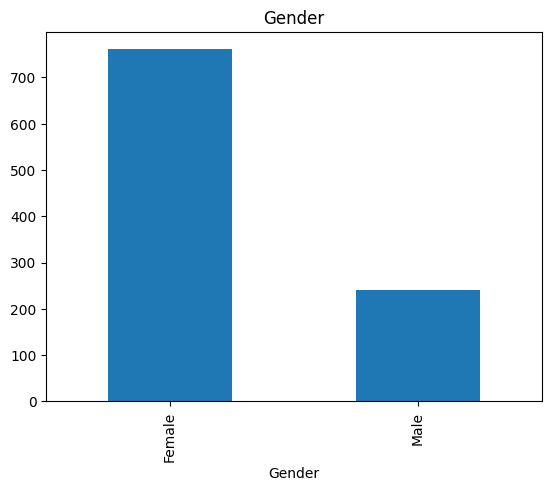

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
gender = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gender)
count.plot(kind='bar', title=feature);

> Fitur course

                         jumlah sampel  persentase
Course                                            
Engineering                        213        21.3
BCS                                177        17.7
BIT                                101        10.1
KOE                                 61         6.1
Islamic Education                   43         4.3
Biomedical Science                  33         3.3
Law                                 32         3.2
Psychology                          29         2.9
BENL                                24         2.4
KIRKHS                              22         2.2
Nursing                             21         2.1
Fiqh                                20         2.0
CTS                                 15         1.5
Business Administration             14         1.4
Communication                       13         1.3
Human Sciences                      13         1.3
MALCOM                              12         1.2
Marine Science                 

<Axes: title={'center': 'Course'}, xlabel='Course'>

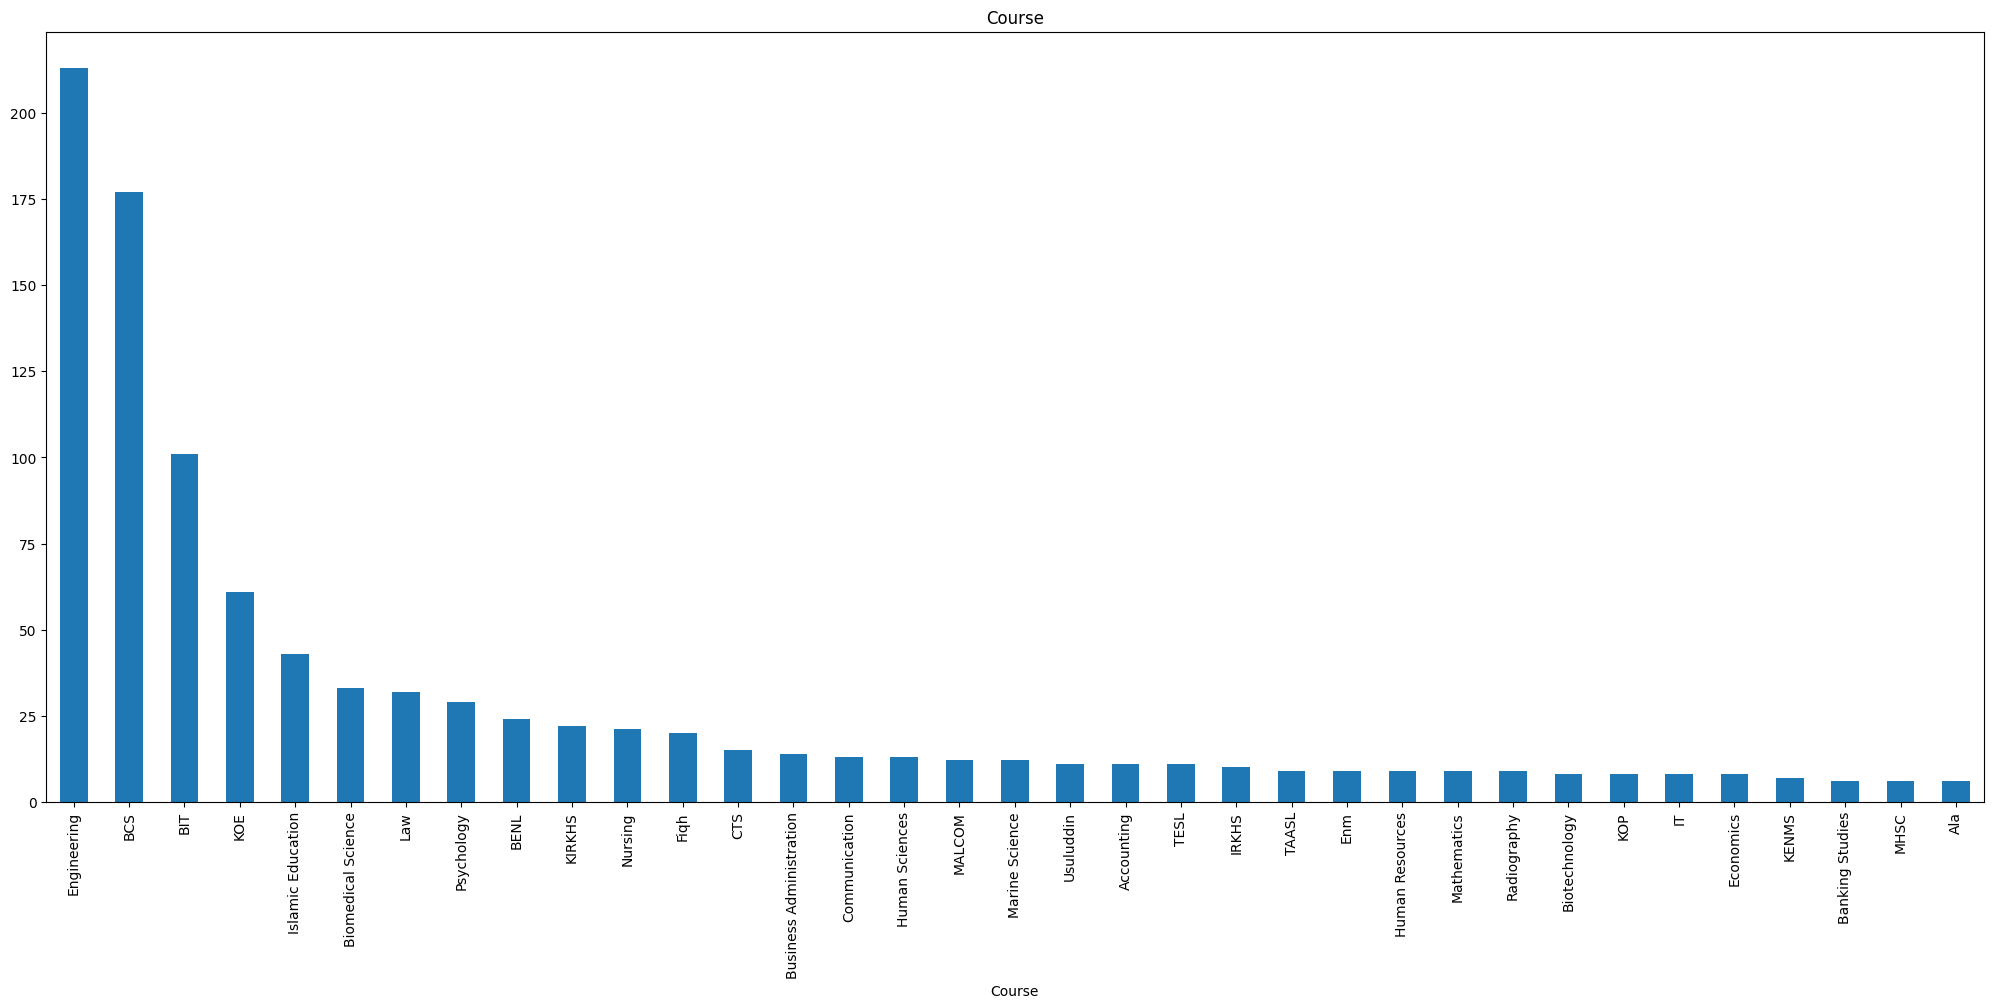

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
course = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(course)
count.plot(kind='bar', title=feature, figsize=(25,10))

> Fitur years of study

             jumlah sampel  persentase
YearOfStudy                           
year 1                 412        41.2
year 2                 274        27.4
year 3                 240        24.0
year 4                  74         7.4


<Axes: title={'center': 'YearOfStudy'}, xlabel='YearOfStudy'>

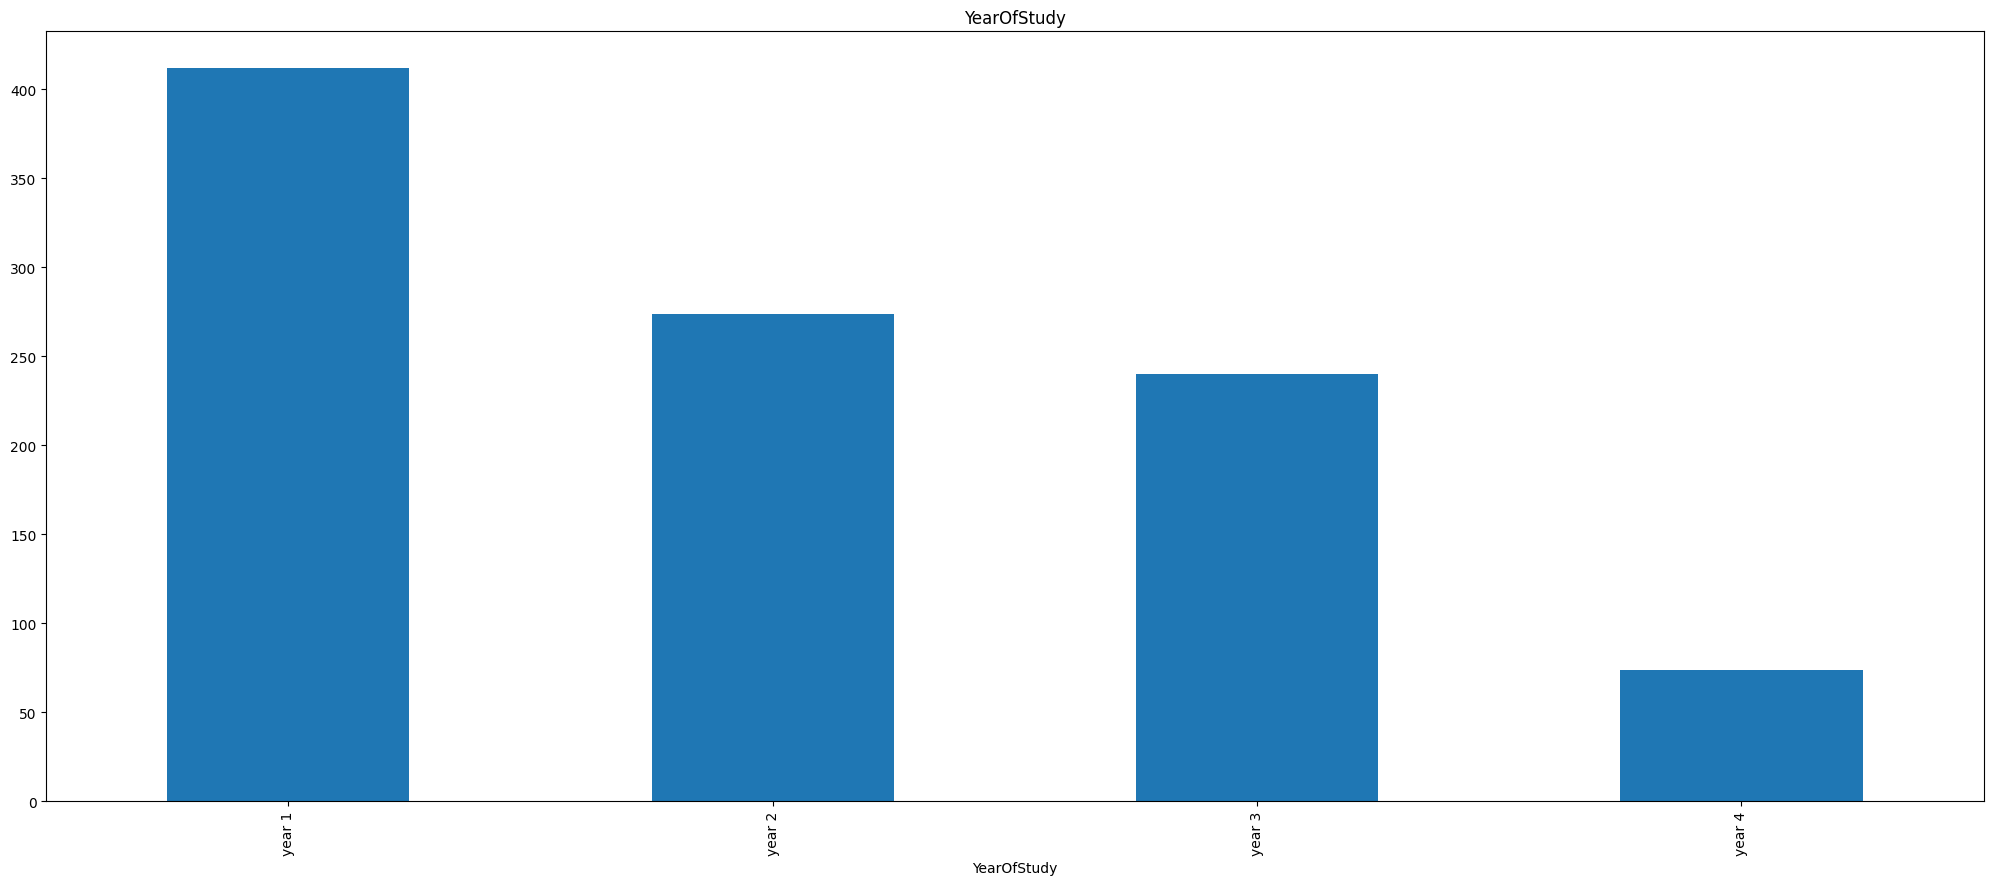

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
yos = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(yos)
count.plot(kind='bar', title=feature, figsize=(25,10))

#### Fitur numerik

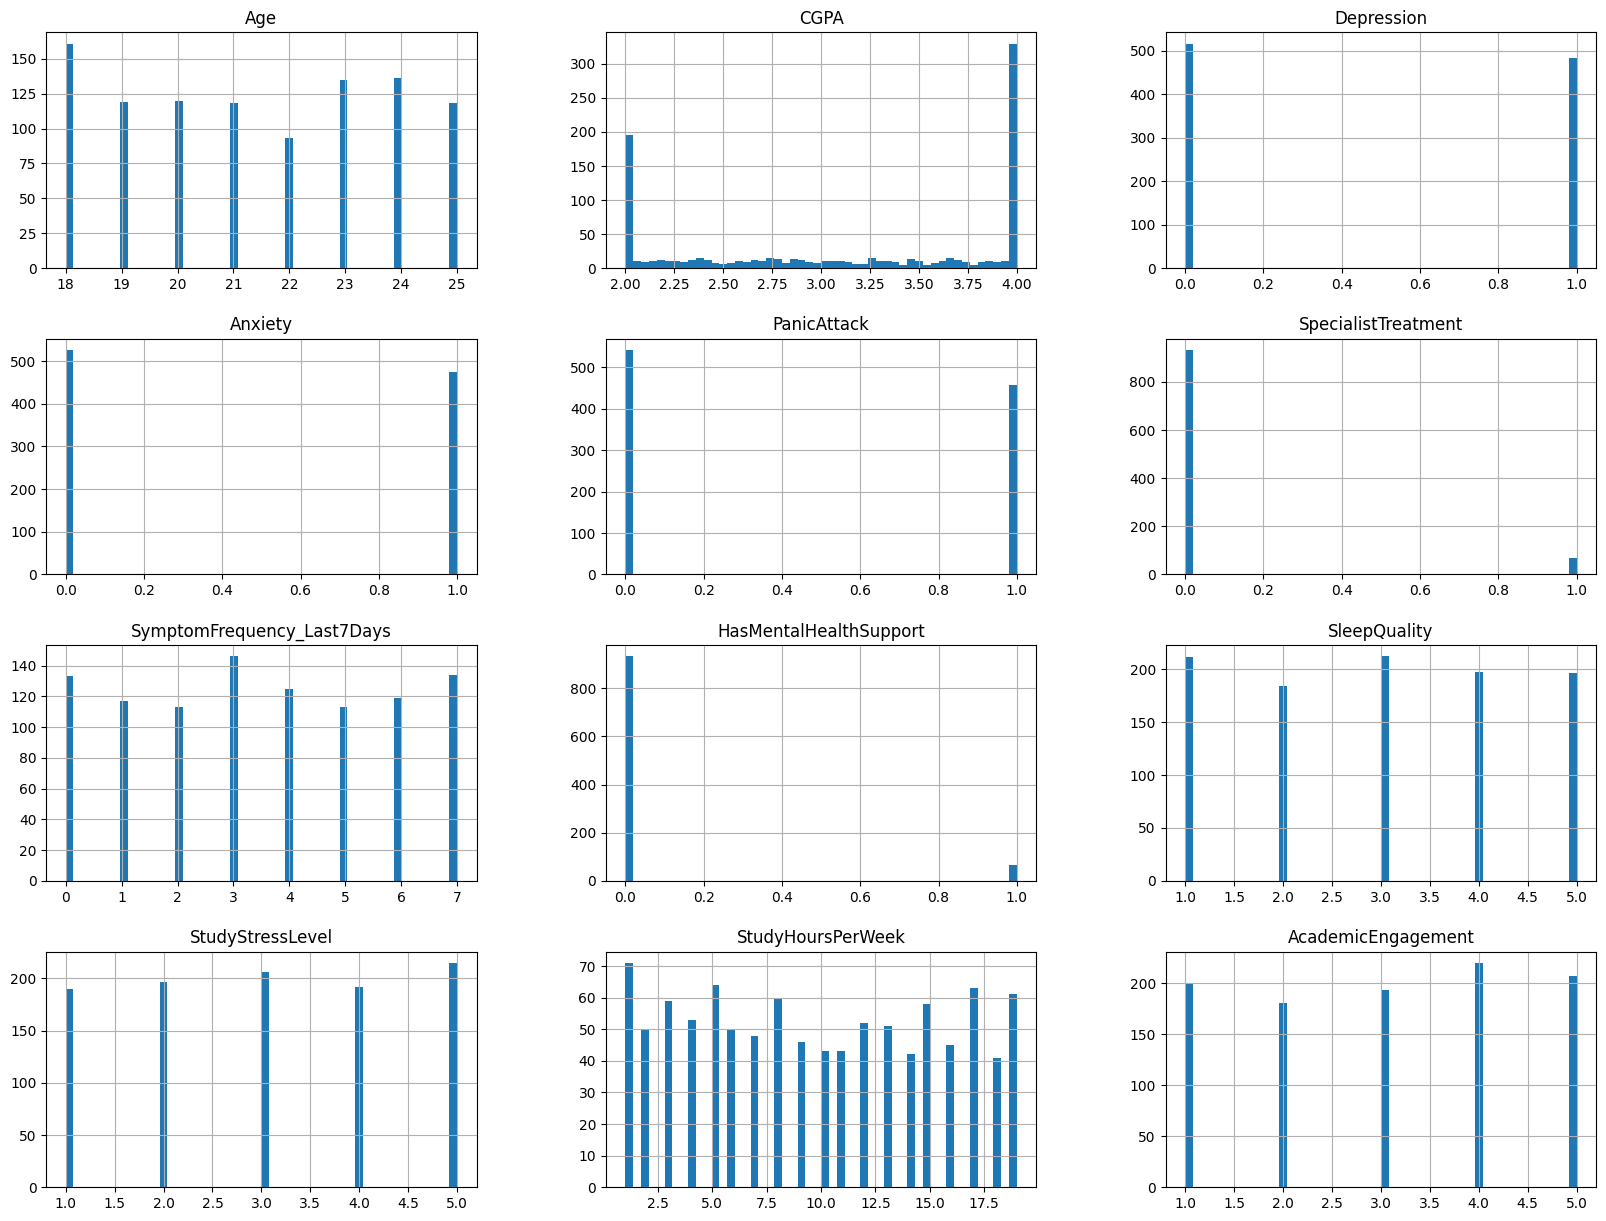

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
sakit_mental = df[(df['Depression'] == 1) | (df['Anxiety'] == 1) | (df['PanicAttack'] == 1)]
jumlah_sakit_mental = len(sakit_mental)

sehat_mental = df[(df['Depression'] == 0) & (df['Anxiety'] == 0) & (df['PanicAttack'] == 0)]
jumlah_sehat_mental = len(sehat_mental)

total_mahasiswa = len(df)

print(f"Total mahasiswa        : {total_mahasiswa}")
print(f"Mahasiswa dengan gangguan mental : {jumlah_sakit_mental}")
print(f"Mahasiswa tanpa gangguan mental : {jumlah_sehat_mental}")


Total mahasiswa        : 1000
Mahasiswa dengan gangguan mental : 845
Mahasiswa tanpa gangguan mental : 155


Hasil analisis : <br>
- Mayoritas responden adalah perempuan, yaitu 76%, sementara laki-laki 24%.
- Program studi terbanyak berasal dari: Engineering, BCS, dan BIT.
- Sebagian besar mahasiswa berasal dari tingkat 1 (412 responden), disusul tingkat 2 (274), tingkat 3 (240), dan tingkat 4 (74).
- Rentang usia responden berkisar antara 18 hingga 25 tahun.
- IPK (GPA) paling banyak berada di kisaran 4.0 dan 2.0.
- Sebagian besar responden tidak mendapatkan perlakuan khusus (special treatment).
- Jumlah mahasiswa yang mengalami depresi, kecemasan (anxiety), dan panic attack seimbang (50:50).
- Mahasiswa umumnya menghabiskan waktu minimal 40 jam per minggu untuk belajar, bahkan ada yang mencapai 70 jam.
- sebanyak 845 dari 1000 data mengalami sakit mental baik depresi, anxiety, dan panick attack.

### 2.2.5 Multivariate Analysis

#### Fitur kategori

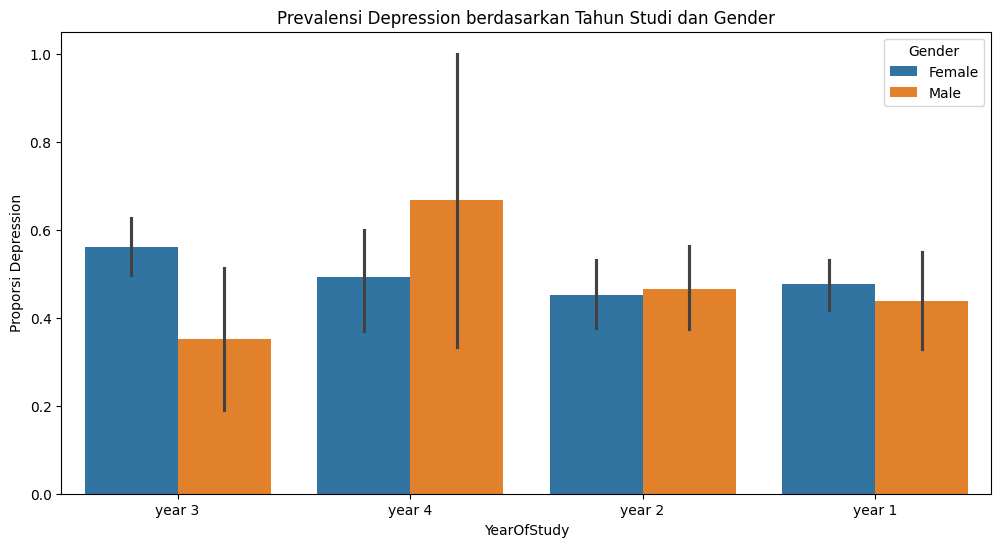

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='YearOfStudy', y='Depression', hue='Gender', data=df)
plt.title('Prevalensi Depression berdasarkan Tahun Studi dan Gender')
plt.ylabel('Proporsi Depression')
plt.show()

Prevalensi depresi bervariasi berdasarkan tahun studi dan gender. Tahun studi 4 menunjukkan prevalensi tertinggi, terutama pada pria, namun dengan ketidakpastian data yang tinggi. Sementara itu, tahun studi 1 dan 2 menunjukkan prevalensi yang lebih seimbang antara gender.

#### Fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

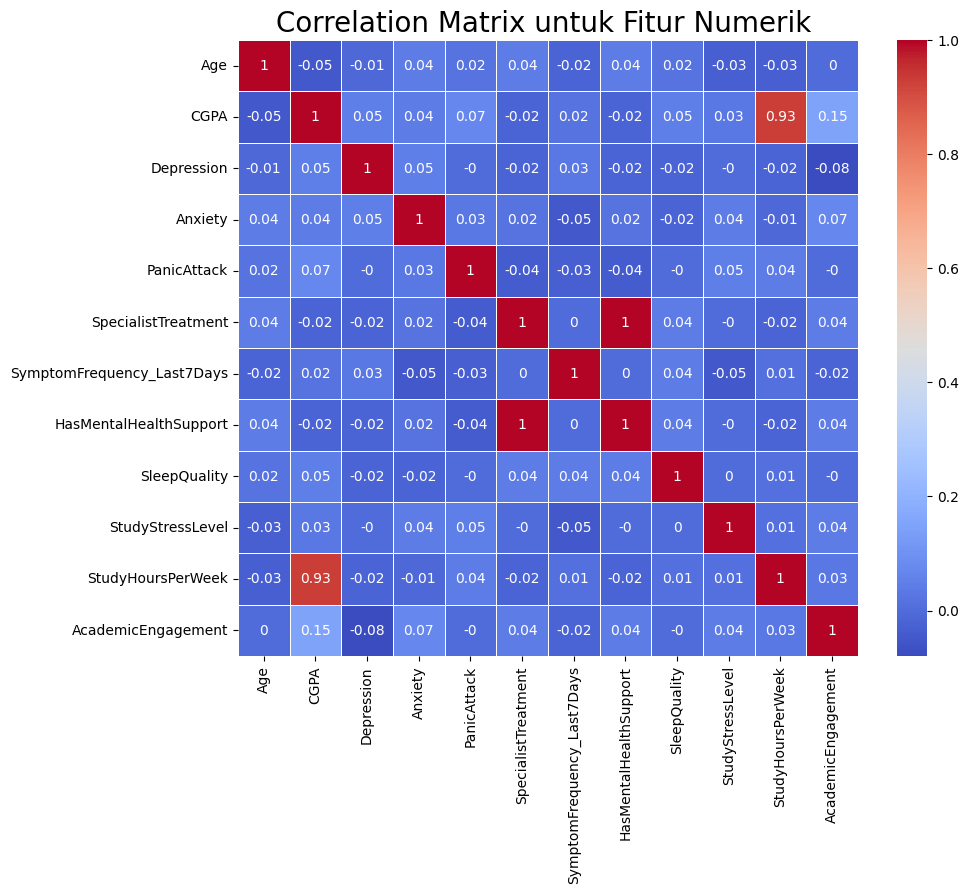

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Matriks korelasi menunjukkan beberapa hubungan antara fitur numerik. Korelasi positif terkuat terlihat antara 'StudyHoursPerWeek' dan 'CGPA' (0.93), menunjukkan bahwa semakin banyak jam belajar per minggu, IPK cenderung meningkat.

# **3. Data Preparation**

In [ ]:
df['MentalHealthScore'] = df['Depression'] + df['Anxiety'] + df['PanicAttack']
df.drop(['Depression', 'Anxiety', 'PanicAttack','Timestamp'], axis=1, inplace=True)

df.head()

,Gender,Age,Course,YearOfStudy,CGPA,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,MentalHealthScore
0,Female,24,Biotechnology,year 3,2.38,0,5,0,4,5,8,2,1
1,Female,18,Biotechnology,year 3,4.00,0,0,0,4,4,13,5,1
2,Female,25,Biotechnology,year 3,3.68,0,3,0,1,2,13,1,1
3,Female,18,Engineering,year 4,4.00,0,3,0,5,1,19,2,0
4,Female,20,Engineering,year 4,2.00,0,0,0,2,4,3,2,2


Menggabungkan tiga indikator kesehatan mental (Depresi, Kecemasan, dan Serangan Panik) menjadi satu skor komposit baru yang disebut 'MentalHealthScore'. Setelah skor baru ini dibuat, kolom-kolom asli yang digunakan untuk membuatnya, ditambah kolom 'Timestamp', dihapus dari data. Hal ini menghasilkan tampilan data yang lebih ringkas, fokus pada skor kesehatan mental agregat.

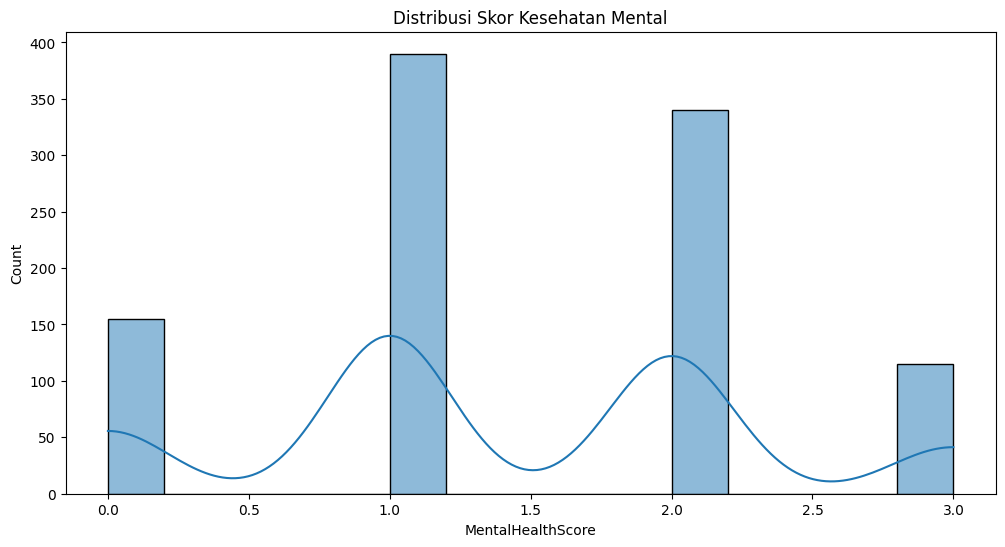

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MentalHealthScore', kde=True)
plt.title('Distribusi Skor Kesehatan Mental')
plt.show()


Grafik ini menunjukkan sebaran nilai skor kesehatan mental. Terlihat ada beberapa kelompok orang dengan skor yang berbeda-beda, yaitu ada banyak orang dengan skor sekitar 1, banyak juga yang skornya sekitar 2, dan beberapa di skor 0 atau 3. Ini menandakan bahwa tingkat kesehatan mental orang tidak sama.

In [ ]:
df_copy = df.copy()

## 3.1 Mapping

Dilakukan transformasi nilai string menjadi numerik untuk kolom 'Gender' dan 'YearOfStudy' menggunakan mapping manual. Teknik ini disebut Label Encoding, di mana:
- 'Gender' diubah menjadi binary (Female=0, Male=1)

- 'YearOfStudy' diubah menjadi ordinal (Year 1=1, ..., Year 4=4)

In [ ]:
df_copy['Gender'] = df_copy['Gender'].map({'Female': 0, 'Male': 1})
df_copy['YearOfStudy'] = df_copy['YearOfStudy'].map({'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4},)

## 3.2 Split dataset

Dataset dibagi menjadi data training (80%) dan testing (20%) menggunakan train_test_split. Kolom target yang diprediksi adalah MentalHealthScore, sedangkan semua kolom lainnya digunakan sebagai fitur. Parameter random_state=123 diterapkan untuk memastikan pembagian data konsisten dan terdistribusi merata setiap kali kode dijalankan.

In [ ]:
X = df_copy.drop(["MentalHealthScore"],axis =1)
y = df_copy["MentalHealthScore"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


## 3.3 Frequency Encoding

Pada kolom Course yang memiliki banyak kategori jurusan, digunakan frequency encoding untuk mengubah setiap kategori menjadi nilai numerik berdasarkan frekuensi kemunculannya di data latih. Teknik ini bekerja dengan memetakan setiap jurusan ke probabilitas relatifnya (nilai antara 0 dan 1), sehingga mempertahankan informasi distribusi data tanpa menambah dimensi seperti one-hot encoding

In [ ]:
course_freq = X_train['Course'].value_counts(normalize=True)
X_train['Course'] = X_train['Course'].map(course_freq)

In [ ]:
X_train['Course'].head()

,Course
512,0.01250
685,0.17000
997,0.01500
927,0.00625
376,0.17000


## 3.4 MinMaxScaler

Kolom Age, CGPA, dan StudyHoursPerWeek memiliki nilai numerik yang sangat bervariasi skalanya, sehingga dilakukan normalisasi menggunakan MinMaxScaler untuk membawa semua fitur ke rentang seragam (biasanya 0-1). Hal ini penting agar algoritma machine learning (terutama KNN dan Boosting) tidak bias terhadap fitur dengan skala lebih besar, sehingga semua variabel berkontribusi secara seimbang dalam pelatihan model.

In [ ]:
cols_to_scale = ['Age', 'CGPA', 'StudyHoursPerWeek']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_train[cols_to_scale].head()

,Age,CGPA,StudyHoursPerWeek
512,0.285714,0.295,0.444444
685,0.571429,0.430,0.388889
997,0.142857,0.000,0.111111
927,0.714286,0.130,0.277778
376,1.000000,0.000,0.055556


In [ ]:
X_train.head()

,Gender,Age,Course,YearOfStudy,CGPA,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
512,0,0.285714,0.01250,2,0.295,0,2,0,5,2,0.444444,1
685,1,0.571429,0.17000,2,0.430,0,0,0,4,1,0.388889,1
997,0,0.142857,0.01500,2,0.000,0,1,0,5,4,0.111111,1
927,0,0.714286,0.00625,1,0.130,1,6,1,3,3,0.277778,1
376,0,1.000000,0.17000,4,0.000,0,5,0,2,2,0.055556,3


# **4. Modeling**

Dalam studi kasus ini, saya mengunakan model KNN dan Boosting dan melakukan evaluasi pada model d enganm metrik MSE(Mean Squared Error)

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'aboost'])

## 4.1 KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## 4.2 Boosting Algorithm

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **5**. **Evaluasi Model**

Sebelum evaluasi, kolom `Course` di X_test di-encode menggunakan course_freq (hasil encoding dari data latih) agar konsisten dengan model yang sudah dilatih. lalu kolom `cols_to_scale = Age,CGPA,StudyHoursPerWeek` diskalakan dengan scaler yang sama seperti data latih. Hal ini dilakukan untuk memastikan data uji diproses sama persis seperti data latih, sehingga evaluasi model tetap valid

In [ ]:
X_test_proc = X_test.copy()
X_test_proc['Course'] = X_test_proc['Course'].map(course_freq).fillna(0)
X_test_proc[cols_to_scale] = scaler.transform(X_test_proc[cols_to_scale])

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','aboost'])
model_dict = {'KNN': knn, 'aboost': boosting }

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_proc)) / 1e3
print("Model Evaluation (MSE × 10³):")
mse

Model Evaluation (MSE × 10³):


,train,test
KNN,0.000762,0.000731
aboost,0.000732,0.000706


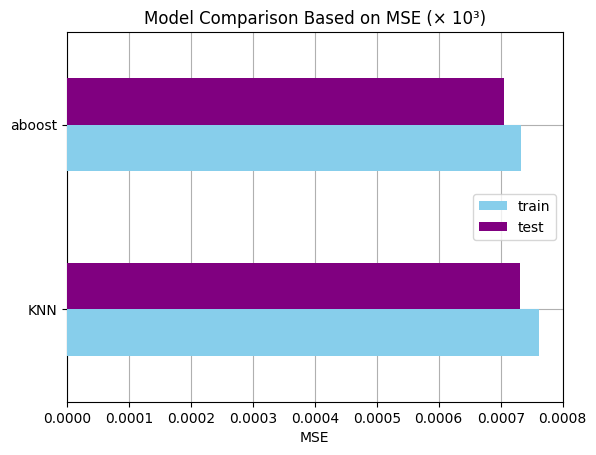

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3, color=['skyblue', 'purple'])
ax.set_title("Model Comparison Based on MSE (× 10³)")
ax.set_xlabel("MSE")
ax.grid(zorder=0)
plt.show()

Berdasarkan hasil evaluasi model, AdaBoost menunjukkan performa yang sedikit lebih baik daripada KNN dengan nilai MSE yang lebih rendah baik pada data latih (train) maupun data uji (test). Kedua model memiliki performa yang sangat baik karena nilai MSE-nya sangat rendah (skala ×10³). Hasil ini juga menunjukkan bahwa kedua model mampu menggeneralisasi dengan baik, terlihat dari selisih MSE train dan test yang kecil.

In [ ]:
prediksi = X_test_proc.iloc[:1].copy()
y_true_sample = y_test.iloc[:1].values[0]

pred_dict = {'y_true': [y_true_sample]}
for name, model in model_dict.items():
    pred_value = model.predict(prediksi)[0]
    pred_dict[f'prediksi_{name}'] = [round(pred_value, 1)]

pd.DataFrame(pred_dict)


,y_true,prediksi_KNN,prediksi_aboost
0,1,1.1,1.5


Model KNN menilai tingkat mentalscore mahasiswa sebesar 1.1, sedangkan model Boosting  memprediksi mentalscore sebesar 1.5. Berdasarkan hasil prediksi ini KNN terlihat ungul dibandingkan model boosting karena nilai KNN lebih mendekati dari nilai yang sebenarnya yaitu 1.


*Walaupun pada evaluasi metrik MSE algortima boosting terlihat unggul, namun perbedaan eror mereka tidak terlalu jauh hanya sebesar 0.00002–0.00003, sehingga dalam praktik, prediksi keduanya bisa terlihat sama-sama akurat atau bahkan KNN sedikit lebih mendekati nilai sebenarnya*

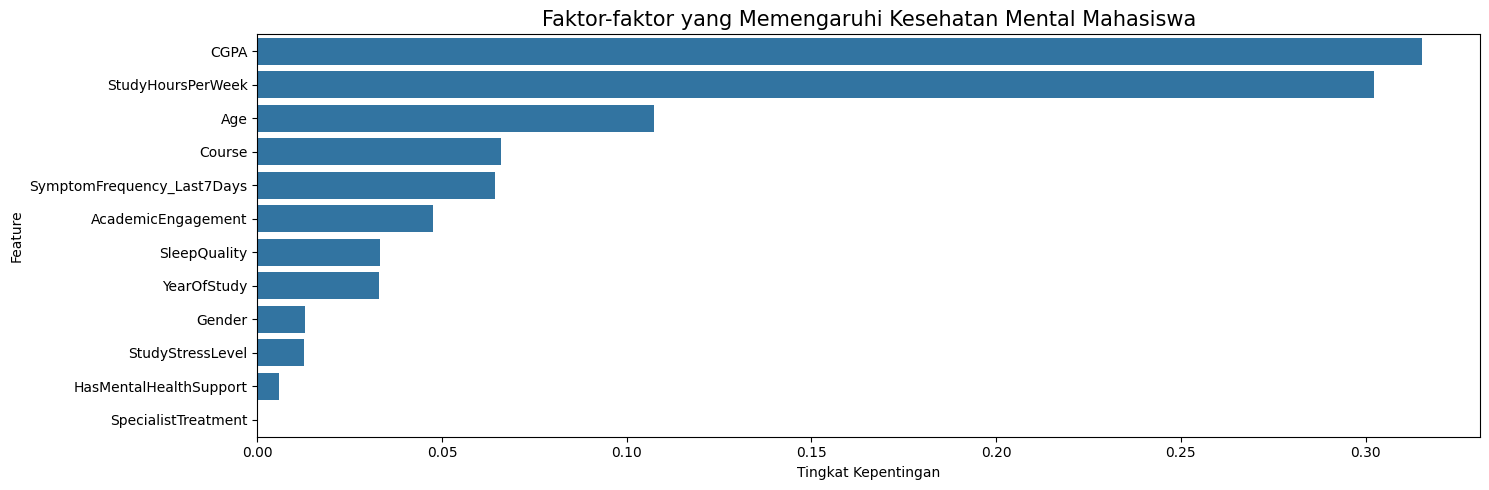

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': boosting.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Faktor-faktor yang Memengaruhi Kesehatan Mental Mahasiswa', fontsize=15)
plt.xlabel('Tingkat Kepentingan')
plt.tight_layout()
plt.show()


Berdasarkan grafik diatas dapat diketahui bahwa nilai GPA dan durasi mahasiswa belajar dalam semingu memiliki pengaruh yang sangat penting terhadap kesehatan mental mahasiswa